# Q1. Theory and concepts

## 1. Explain the concept of batch normalization in the context of Artificial Neural Networks

Batch normalization is a technique used in the training of artificial neural networks to standardize the inputs of each layer, making the network more stable and efficient. It aims to address the problem of internal covariate shift, which refers to the change in the distribution of network activations as the parameters of the preceding layers change during training. This can slow down the training process and make it difficult to choose appropriate learning rates.

## 2. Describe the benefits of using batch normalization during training

The working principle of batch normalization involves two key steps:

1. Normalization Step: In this step, the inputs to a specific layer are normalized to have a mean of zero and a variance of one. This is done by subtracting the batch mean and dividing by the batch standard deviation, calculated over each mini-batch during the training process. This normalization ensures that the inputs to each layer have a similar distribution, reducing the internal covariate shift.

2. Learnable Parameters: Batch normalization introduces learnable parameters, namely gamma and beta, for each layer. These parameters allow the model to learn the optimal scale and shift of the normalized values. Gamma controls the standard deviation of the outputs of the layer, while beta controls the mean. By allowing the network to learn the best scale and shift for each layer, batch normalization helps the model to adapt to different types of data and improve the learning process.


## 3. Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.

The benefits of using batch normalization during training include:

1. Improved Training Speed: Batch normalization reduces internal covariate shift, allowing for higher learning rates and faster convergence during training. This results in faster training times and more stable learning dynamics.

2. Better Generalization: By reducing the dependency of the network on specific parameter initializations, batch normalization helps the model generalize better to unseen data, leading to improved performance on validation and test sets.

3. Reduction of Vanishing and Exploding Gradients: Batch normalization helps alleviate the vanishing and exploding gradient problems by maintaining stable activation values throughout the network. This allows for the training of deeper networks without encountering gradient-related issues.

4. Regularization Effect: Batch normalization acts as a form of regularization by adding noise to the training process, reducing overfitting and improving the model's ability to generalize to unseen data.



# Q2. Implementation

### 1. Choose a dataset of your choice (e.g., MNIST, CIAR-0) and preprocess it

In [1]:
import tensorflow as tf
import pandas as pd

In [3]:
mnist=tf.keras.datasets.mnist

In [5]:
(xtrain_full,ytrain_full),(xtest,ytest)=mnist.load_data()

In [8]:
xtrain_full.shape,xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [12]:
from sklearn.model_selection import train_test_split

xtrain,xvalid,ytrain,yvalid=train_test_split(xtrain_full,ytrain_full,test_size=0.25,random_state=42)

In [13]:
xvalid.shape

(15000, 28, 28)

### 2. Implement a simple feedforward neural network using any deep learning framework/library (e.g., Tensorlow, pyTorch)


### 3. Train the neural network on the chosen dataset without using batch normalization


In [35]:
LAYERS=[
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ]
model_no_norm=tf.keras.models.Sequential(LAYERS)   #model without normalization

model_no_norm.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
history_no_norm=model_no_norm.fit(xtrain,ytrain,epochs=10 ,validation_data=(xvalid,yvalid))

Epoch 1/10
1407/1407 [==============================] - 14s 9ms/step - loss: 1.6497 - accuracy: 0.8342 - val_loss: 0.5023 - val_accuracy: 0.8911
Epoch 2/10
1407/1407 [==============================] - 15s 11ms/step - loss: 0.3258 - accuracy: 0.9158 - val_loss: 0.3020 - val_accuracy: 0.9309
Epoch 3/10
1407/1407 [==============================] - 12s 9ms/step - loss: 0.2089 - accuracy: 0.9427 - val_loss: 0.2508 - val_accuracy: 0.9349
Epoch 4/10
1407/1407 [==============================] - 14s 10ms/step - loss: 0.1743 - accuracy: 0.9519 - val_loss: 0.1891 - val_accuracy: 0.9539
Epoch 5/10
1407/1407 [==============================] - 13s 9ms/step - loss: 0.1500 - accuracy: 0.9577 - val_loss: 0.1901 - val_accuracy: 0.9521
Epoch 6/10
1407/1407 [==============================] - 14s 10ms/step - loss: 0.1369 - accuracy: 0.9633 - val_loss: 0.1595 - val_accuracy: 0.9609
Epoch 7/10
1407/1407 [==============================] - 12s 8ms/step - loss: 0.1239 - accuracy: 0.9668 - val_loss: 0.2024 - val

In [37]:
history_no_norm_df=pd.DataFrame(history_no_norm.history)
history_no_norm_df

,loss,accuracy,val_loss,val_accuracy
0,1.649663,0.834200,0.502278,0.891067
1,0.325811,0.915844,0.302006,0.930933
2,0.208869,0.942667,0.250772,0.934867
3,0.174260,0.951933,0.189078,0.953933
4,0.150010,0.957733,0.190139,0.952133
5,0.136861,0.963333,0.159469,0.960933
6,0.123941,0.966844,0.202363,0.958533
7,0.104857,0.972356,0.177789,0.960800
8,0.113417,0.971444,0.179349,0.962067
9,0.093682,0.975044,0.183465,0.961000


<Axes: >

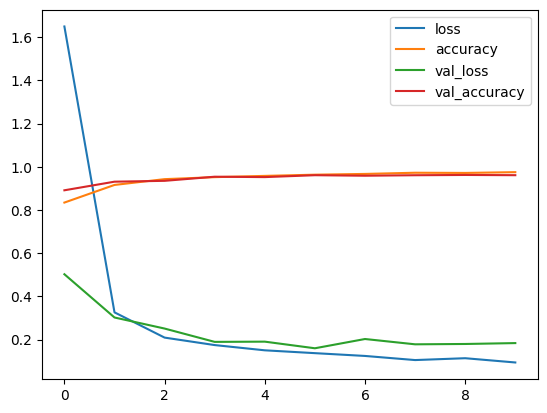

In [38]:
history_no_norm_df.plot()

### 4. Implement batch normalization layers in the neural network and train the model again


In [39]:
LAYERS=[
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
    ]
model_with_norm=tf.keras.models.Sequential(LAYERS)   #model with normalization

model_with_norm.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
history_with_norm=model_with_norm.fit(xtrain,ytrain,epochs=10 ,validation_data=(xvalid,yvalid))

Epoch 1/10
1407/1407 [==============================] - 20s 13ms/step - loss: 0.2366 - accuracy: 0.9285 - val_loss: 0.1643 - val_accuracy: 0.9529
Epoch 2/10
1407/1407 [==============================] - 16s 11ms/step - loss: 0.1200 - accuracy: 0.9627 - val_loss: 0.1358 - val_accuracy: 0.9683
Epoch 3/10
1407/1407 [==============================] - 14s 10ms/step - loss: 0.0906 - accuracy: 0.9716 - val_loss: 0.3760 - val_accuracy: 0.9688
Epoch 4/10
1407/1407 [==============================] - 16s 12ms/step - loss: 0.0722 - accuracy: 0.9774 - val_loss: 0.1640 - val_accuracy: 0.9731
Epoch 5/10
1407/1407 [==============================] - 17s 12ms/step - loss: 0.0607 - accuracy: 0.9802 - val_loss: 0.1724 - val_accuracy: 0.9711
Epoch 6/10
1407/1407 [==============================] - 15s 10ms/step - loss: 0.0488 - accuracy: 0.9839 - val_loss: 0.1729 - val_accuracy: 0.9727
Epoch 7/10
1407/1407 [==============================] - 17s 12ms/step - loss: 0.0470 - accuracy: 0.9847 - val_loss: 0.2485 -

In [43]:
history_with_norm_df=pd.DataFrame(history_with_norm.history)
history_with_norm_df

,loss,accuracy,val_loss,val_accuracy
0,0.236599,0.928467,0.164335,0.952933
1,0.119972,0.962667,0.135843,0.968267
2,0.090613,0.971600,0.375981,0.968800
3,0.072173,0.977378,0.163977,0.973067
4,0.060662,0.980156,0.172372,0.971133
5,0.048833,0.983911,0.172895,0.972667
6,0.047029,0.984689,0.248537,0.963933
7,0.038396,0.987267,0.178924,0.974133
8,0.034359,0.988378,0.199181,0.974933
9,0.033907,0.988667,0.224957,0.976000


<Axes: >

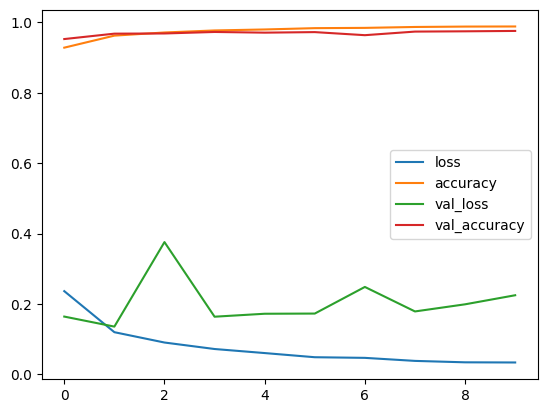

In [44]:
history_with_norm_df.plot()

### 5. Compare the training and validation performance (e.g., accuracy, loss) between the models with and without batch normalization

In [58]:
history_with_norm_df.iloc[-1]-history_no_norm_df.iloc[-1]

loss           -0.059776
accuracy        0.013622
val_loss        0.041491
val_accuracy    0.015000
Name: 9, dtype: float64

### Result
- We could see that model with batch normalization has higher accuracy (0.015 more) and lower loss(0.059 less)

### 6. Discuss the impact of batch normalization on the training process and the performance of the neural network.

1. **Improved Training Stability:** Batch normalization reduces the internal covariate shift, making the network less sensitive to parameter initialization and allowing for smoother and more stable updates during training. This results in faster convergence and more stable training dynamics.

2. **Faster Convergence:** By stabilizing the gradients and enabling the use of higher learning rates, batch normalization accelerates the convergence of the training process. This speedup is particularly beneficial when dealing with deeper networks, where convergence can be more challenging.

3. **Enhanced Generalization:** With reduced internal covariate shift, batch normalization helps the model generalize better to unseen data. By maintaining stable distributions of activations across layers, it prevents the network from overfitting and improves its ability to generalize to new and unseen data.

4. **Easier Hyperparameter Tuning:** Batch normalization reduces the dependence of the model on specific hyperparameter choices, such as learning rates and weight initialization. This property simplifies the process of hyperparameter tuning and allows for more efficient experimentation with various network architectures.

5. **Ability to Use Higher Learning Rates:** Batch normalization allows for the use of higher learning rates without causing the training process to become unstable. This property is especially useful in deep learning tasks, where finding an optimal learning rate is crucial for efficient training.

6. **Alleviation of Vanishing and Exploding Gradients:** Batch normalization mitigates the issues of vanishing and exploding gradients by ensuring that the gradients remain at a reasonable scale throughout the network. This enables the training of deeper networks without encountering the problems associated with unstable gradients.

7. **Reduction of Internal Co-Dependency:** By decoupling the layers' dependencies on one another during training, batch normalization reduces the risk of individual layers relying too heavily on the specific behavior of other layers. This aspect improves the robustness and stability of the overall network.


## Q3. Experimentation and Analysis


### 1. Experiment with different batch sizes and observe the effect on the training dynamics and model performance


In [63]:
batch_sizes=[32,64,128]

for batch in batch_sizes:
    LAYERS=[
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
    ]
    model=tf.keras.models.Sequential(LAYERS)   #model with normalization

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history=model.fit(xtrain, ytrain, epochs=7, validation_data=(xvalid,yvalid), batch_size=batch)
    df=pd.DataFrame(history.history)
    print(f"Model with Batch size {batch} has accuracy of {df.iloc[-1]['accuracy']}")

Epoch 1/7
1407/1407 [==============================] - 17s 10ms/step - loss: 0.2359 - accuracy: 0.9298 - val_loss: 0.1383 - val_accuracy: 0.9612
Epoch 2/7
1407/1407 [==============================] - 19s 14ms/step - loss: 0.1196 - accuracy: 0.9628 - val_loss: 0.1470 - val_accuracy: 0.9647
Epoch 3/7
1407/1407 [==============================] - 19s 14ms/step - loss: 0.0911 - accuracy: 0.9715 - val_loss: 0.1199 - val_accuracy: 0.9684
Epoch 4/7
1407/1407 [==============================] - 17s 12ms/step - loss: 0.0729 - accuracy: 0.9763 - val_loss: 0.1230 - val_accuracy: 0.9694
Epoch 5/7
1407/1407 [==============================] - 19s 14ms/step - loss: 0.0601 - accuracy: 0.9804 - val_loss: 0.1136 - val_accuracy: 0.9719
Epoch 6/7
1407/1407 [==============================] - 19s 13ms/step - loss: 0.0528 - accuracy: 0.9828 - val_loss: 0.1675 - val_accuracy: 0.9746
Epoch 7/7
1407/1407 [==============================] - 19s 14ms/step - loss: 0.0457 - accuracy: 0.9844 - val_loss: 0.1146 - val_ac

## Result
- we could see that model with higher batch_size has better acccuracy

### 2. Discuss the advantages and potential limitations of batch normalization in improving the training of neural networks.



Advantages of Batch Normalization:

1. Improved Training Stability: Batch normalization helps to stabilize the training process by reducing the internal covariate shift, ensuring that each layer's inputs have a consistent distribution. This stability enables the use of higher learning rates, leading to faster convergence during training.

2. Accelerated Training: By enabling the use of higher learning rates and ensuring stable gradients, batch normalization accelerates the training process, reducing the overall training time and computational resources required.

3. Reduced Sensitivity to Weight Initialization: Batch normalization reduces the sensitivity of the model to weight initialization, making it less reliant on carefully chosen initial weights. This property simplifies the process of initializing the weights and biases of the neural network, allowing for faster experimentation and training.

4. Regularization Effect: Batch normalization acts as a form of regularization, reducing overfitting by adding noise to the training process. This noise can help prevent the model from memorizing the training data, leading to improved generalization performance on unseen data.

Potential Limitations of Batch Normalization:

1. Increased Computational Overhead: Batch normalization introduces additional computations during both the forward and backward passes, which can increase the overall computational overhead and training time. In some cases, the computational cost can be significant, especially when training large-scale deep neural networks.

2. Dependency on Batch Size: The effectiveness of batch normalization can be influenced by the choice of batch size. Using very small batch sizes may introduce noise, leading to unstable updates, while very large batch sizes can reduce the generalization capabilities of the model.

3. Reduced Model Interpretability: Batch normalization can make it challenging to interpret the model's behavior since the standardization of each batch may hide the original distribution of the data. This aspect can sometimes hinder the interpretability and transparency of the neural network.

4. Performance Variability: In certain cases, batch normalization may not consistently improve the performance of the model. Its effectiveness can depend on the specific architecture of the neural network, the nature of the data, and the complexity of the task, making it less universally applicable in all scenarios.

